In [1]:
# Import the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data by dividing by 255, so pixel values are between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0  

In [3]:
# Function to compile and train a model
def compile_and_train(model, lr=1e-3, epochs=10):
    # Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metrics
    model.compile(optimizer=Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Train the model and save the history
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
    return history

In [4]:
# Function to plot accuracy curves for training and validation sets
def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Function to plot loss curves for training and validation sets
def plot_loss(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

d:\ANACONDA\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


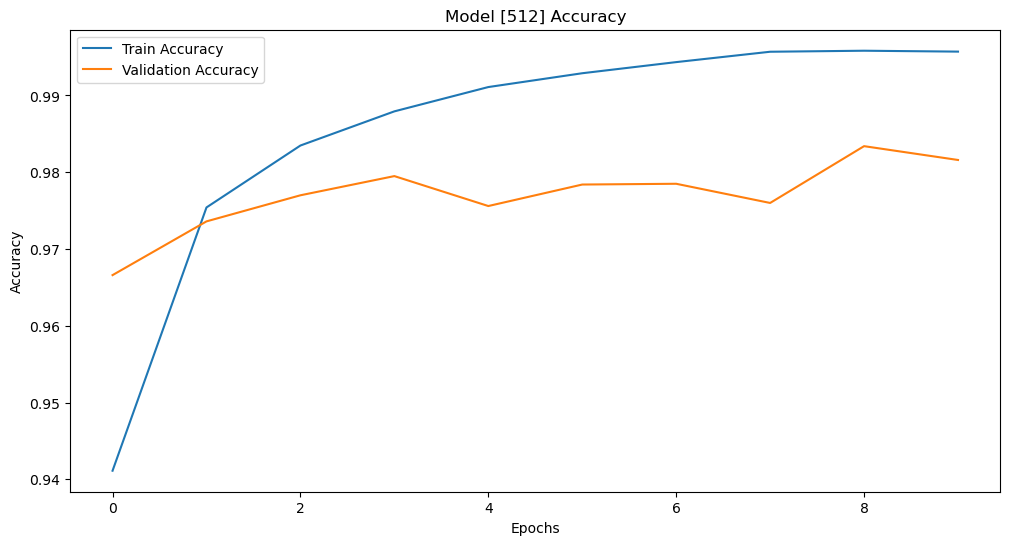

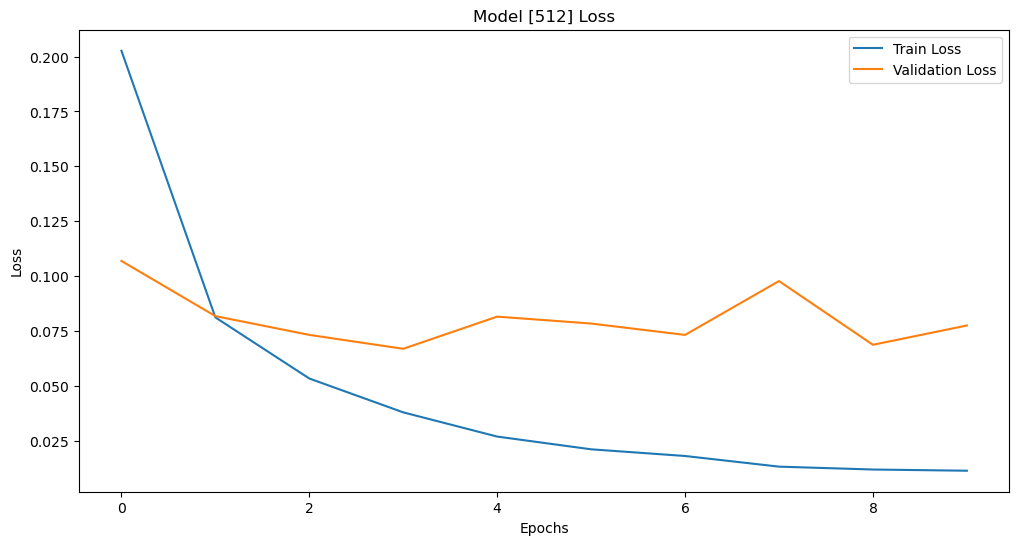

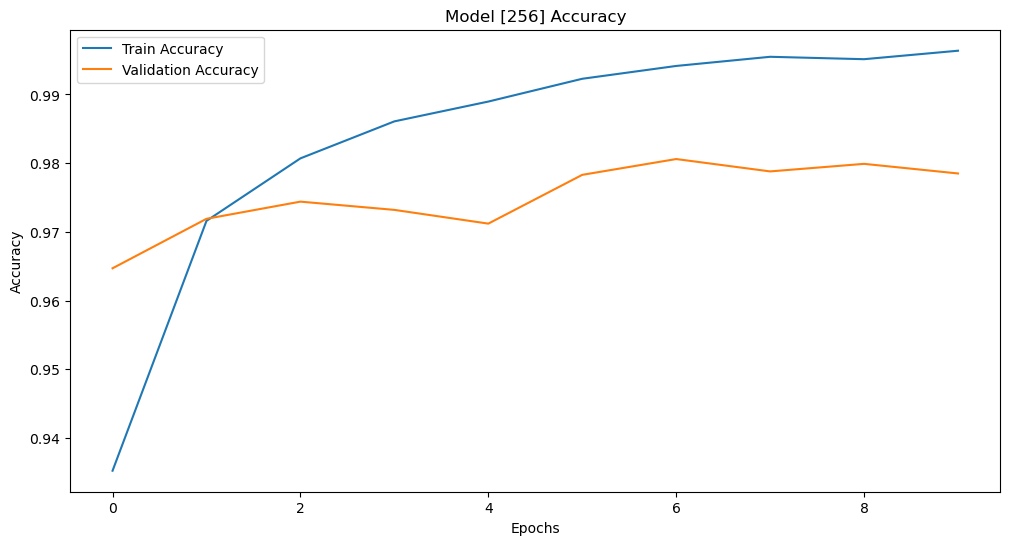

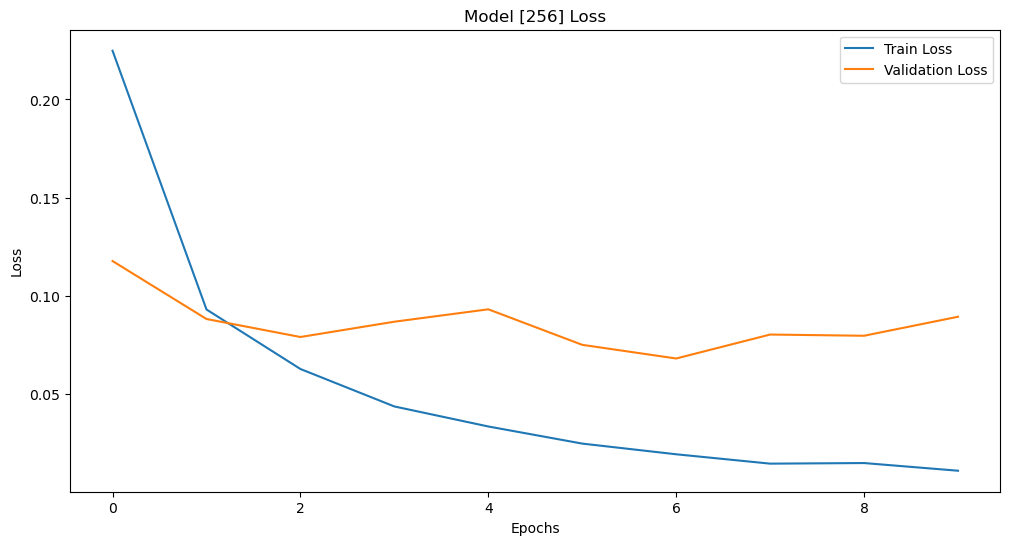

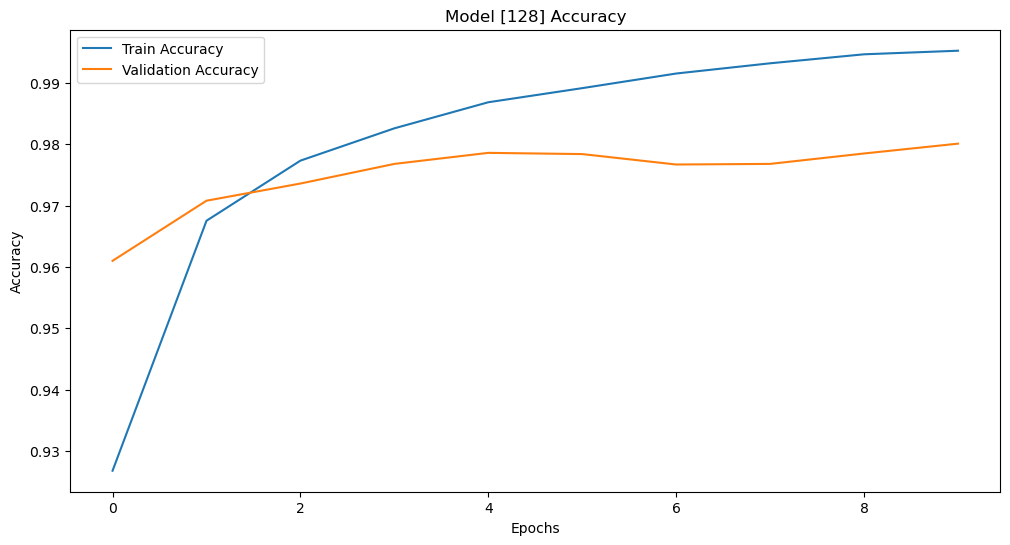

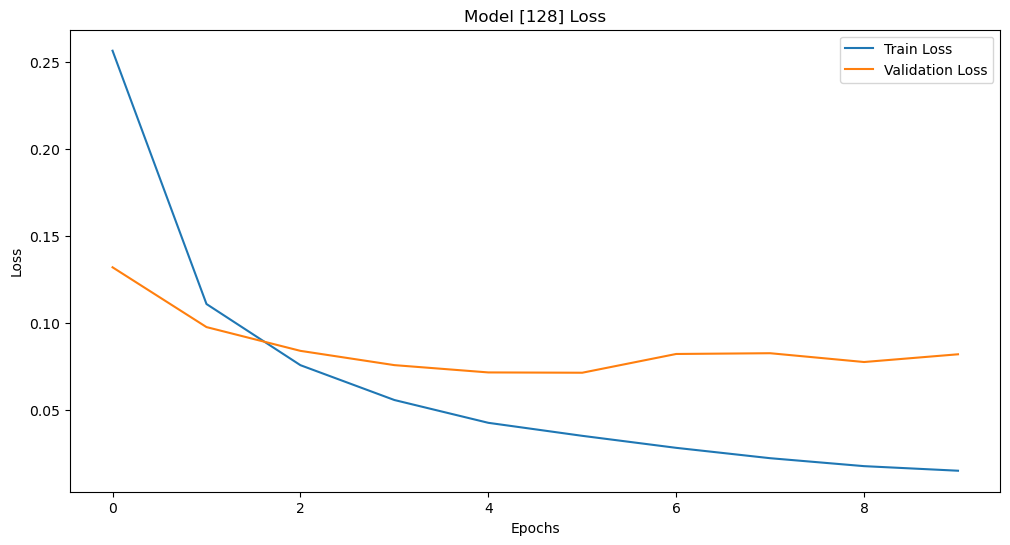

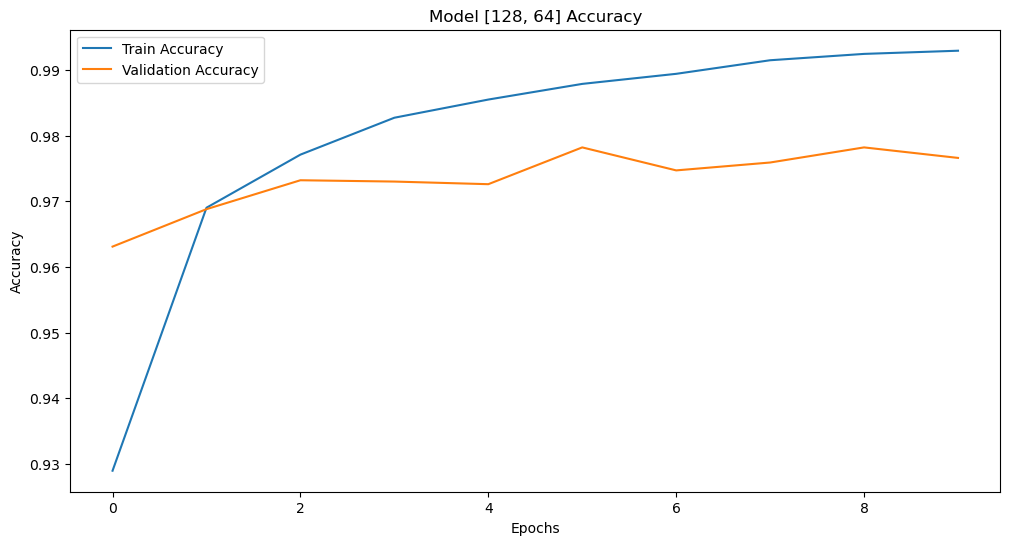

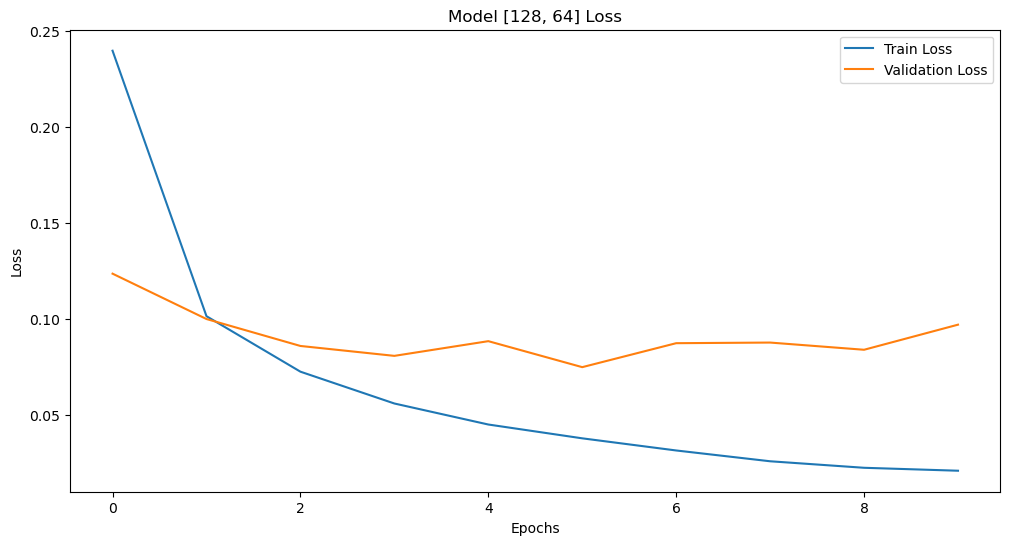

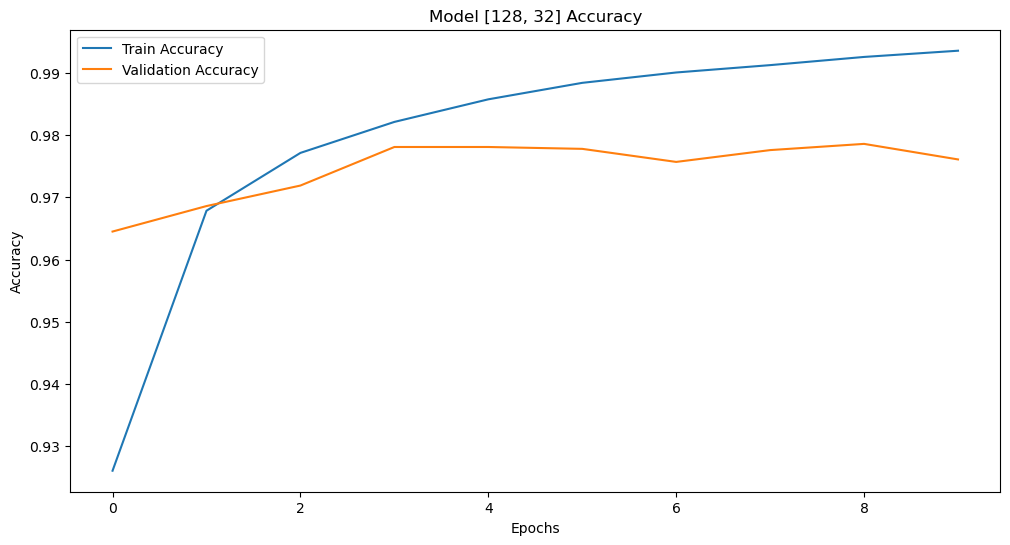

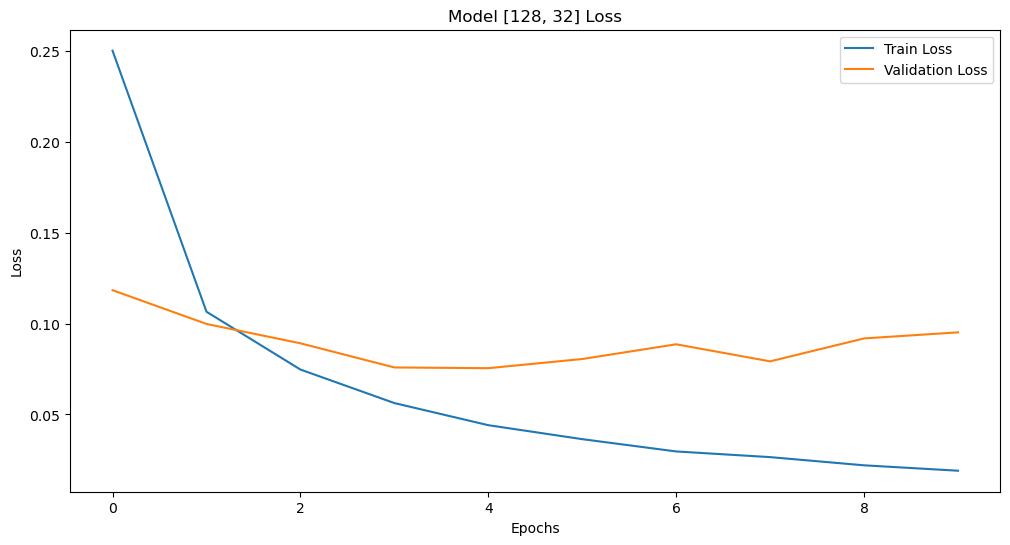

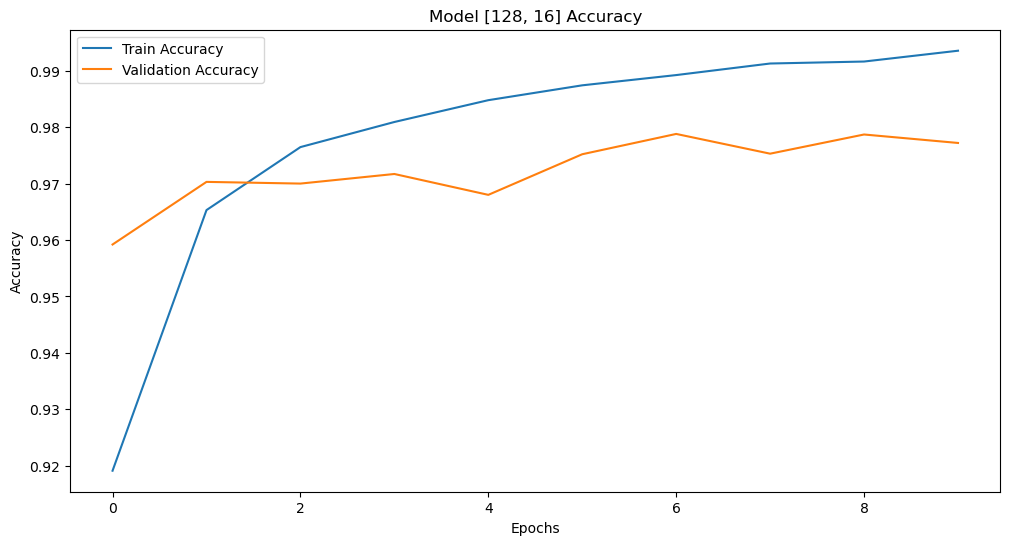

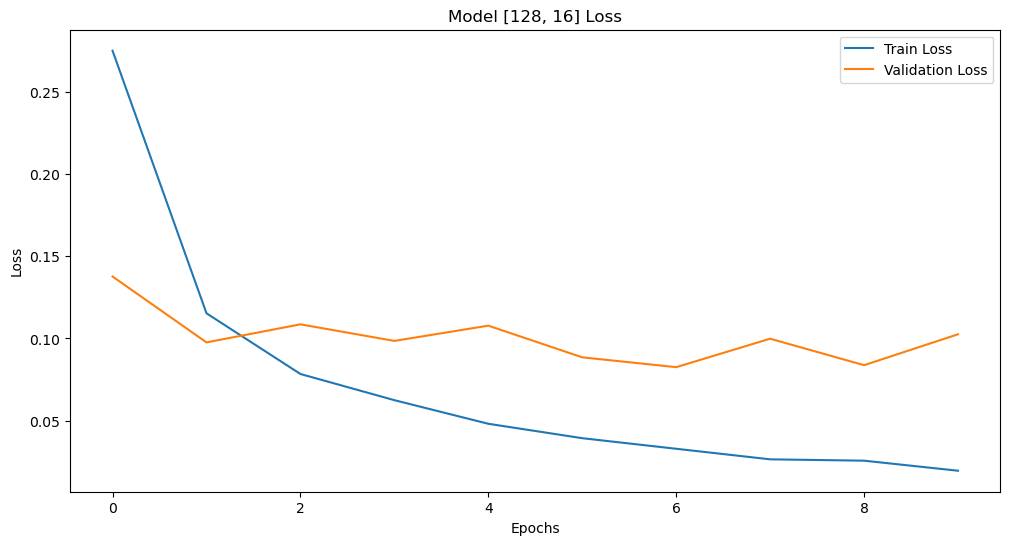

Best architecture: [512] with mean accuracy: 0.9770


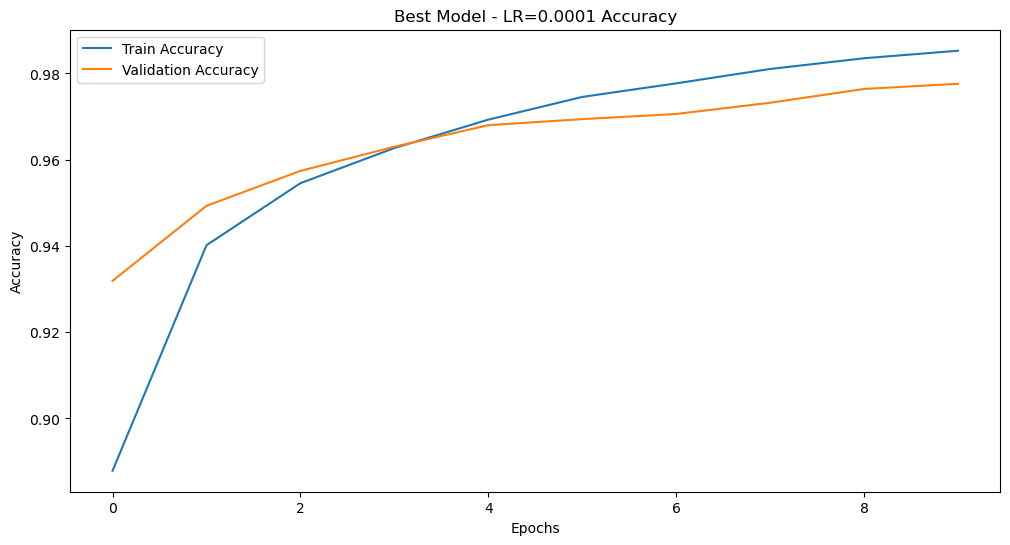

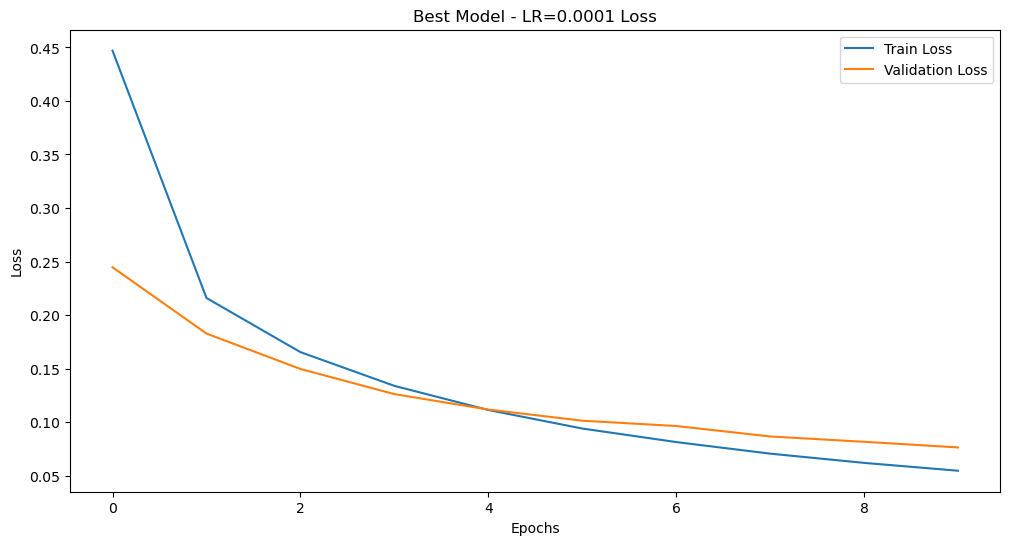

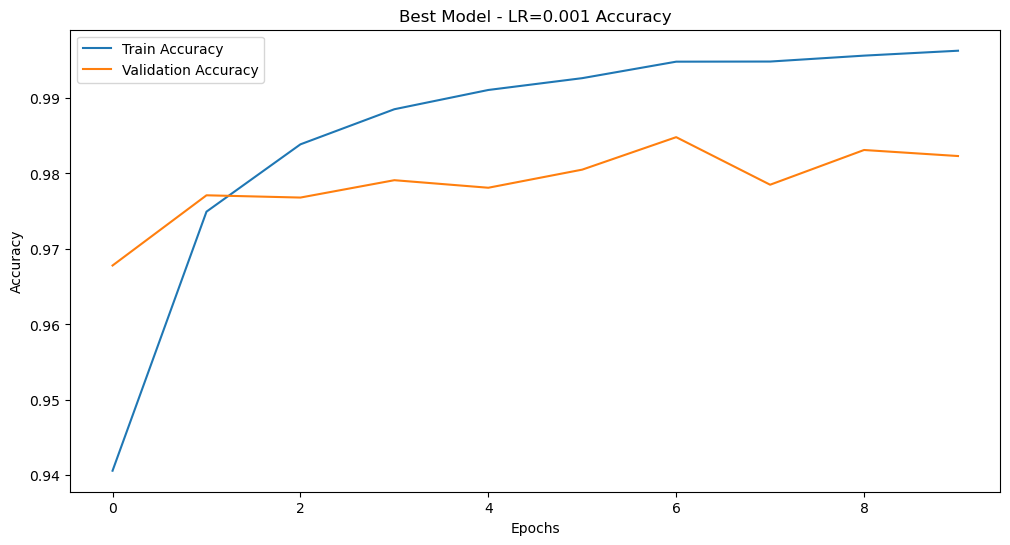

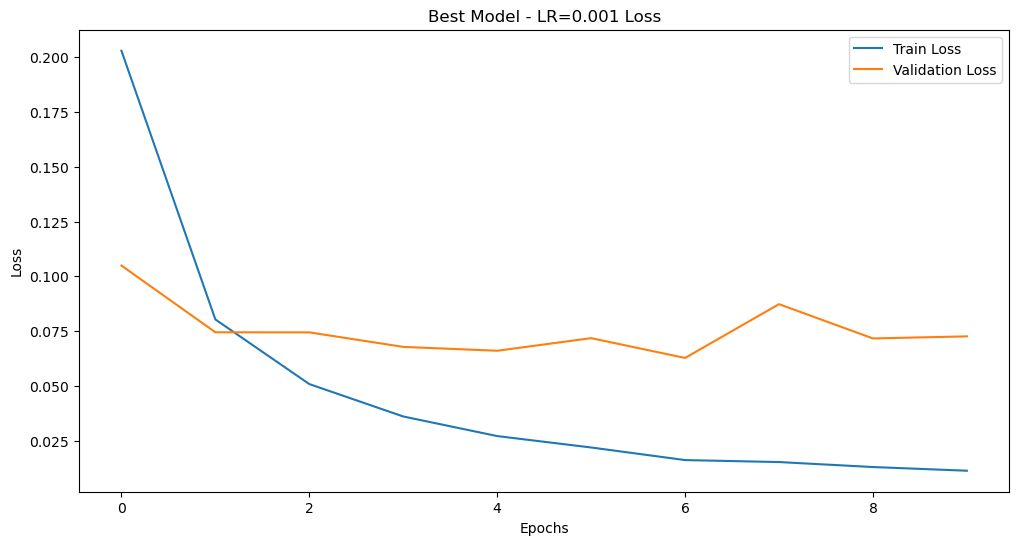

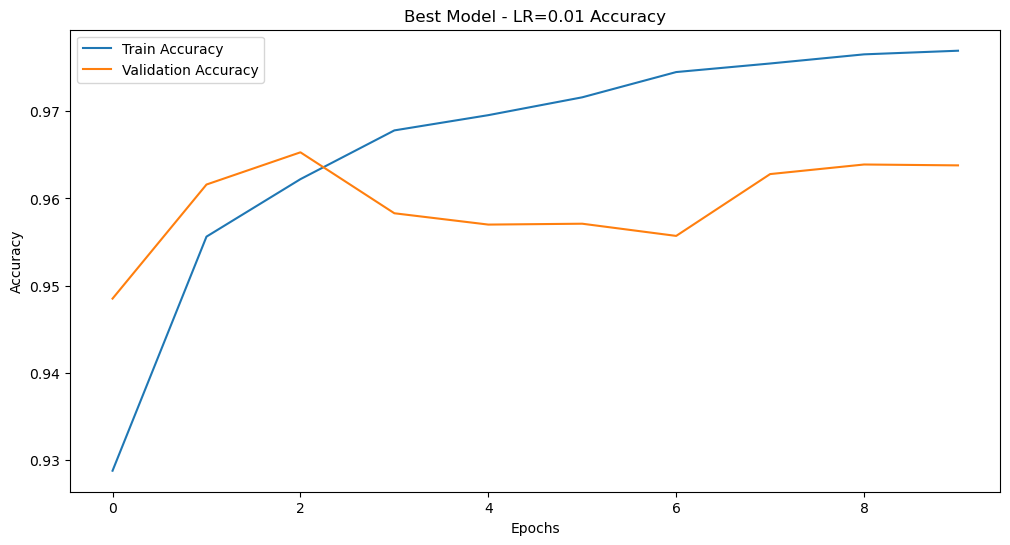

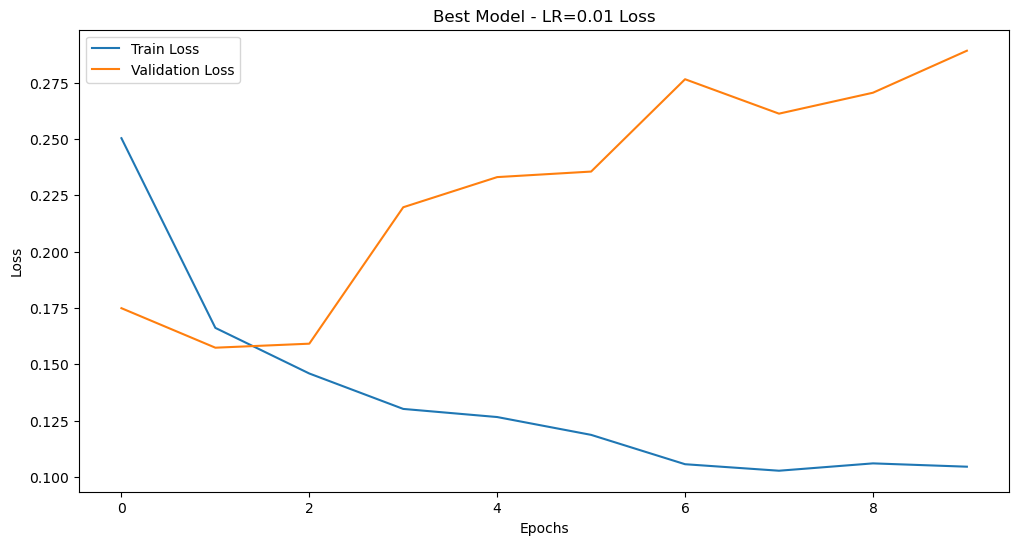

In [5]:
# Model 1: Single hidden layer with 512 neurons
model_1 = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(512, activation='relu'),  
    Dense(10, activation='softmax') 
])
history_1 = compile_and_train(model_1)  
plot_history(history_1, 'Model [512]')  
plot_loss(history_1, 'Model [512]')

# Model 2: Single hidden layer with 256 neurons
model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
history_2 = compile_and_train(model_2)
plot_history(history_2, 'Model [256]')
plot_loss(history_2, 'Model [256]')

# Model 3: Single hidden layer with 128 neurons
model_3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
history_3 = compile_and_train(model_3)
plot_history(history_3, 'Model [128]')
plot_loss(history_3, 'Model [128]')

# Model 4: Two hidden layers with 128 and 64 neurons
model_4 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
history_4 = compile_and_train(model_4)
plot_history(history_4, 'Model [128, 64]')
plot_loss(history_4, 'Model [128, 64]')

# Model 5: Two hidden layers with 128 and 32 neurons
model_5 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
history_5 = compile_and_train(model_5)
plot_history(history_5, 'Model [128, 32]')
plot_loss(history_5, 'Model [128, 32]')

# Model 6: Two hidden layers with 128 and 16 neurons
model_6 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])
history_6 = compile_and_train(model_6)
plot_history(history_6, 'Model [128, 16]')
plot_loss(history_6, 'Model [128, 16]')

# Calculate mean validation accuracy for each model
mean_accuracies = {
    '[512]': np.mean(history_1.history['val_accuracy']),
    '[256]': np.mean(history_2.history['val_accuracy']),
    '[128]': np.mean(history_3.history['val_accuracy']),
    '[128, 64]': np.mean(history_4.history['val_accuracy']),
    '[128, 32]': np.mean(history_5.history['val_accuracy']),
    '[128, 16]': np.mean(history_6.history['val_accuracy'])
}

# Determine the best model architecture based on mean validation accuracy
best_architecture = max(mean_accuracies, key=mean_accuracies.get)
print(f"Best architecture: {best_architecture} with mean accuracy: {mean_accuracies[best_architecture]:.4f}")

# Function to create the best model based on architecture string
def create_model(architecture):
    layers = []
    layers.append(Flatten(input_shape=(28, 28)))
    for units in architecture:
        layers.append(Dense(units, activation='relu'))
    layers.append(Dense(10, activation='softmax'))
    return Sequential(layers)

# Test the best model with different learning rates
learning_rates = [1e-4, 1e-3, 1e-2]
lr_histories = {}
for lr in learning_rates:
    model = create_model(eval(best_architecture))  # Create model based on the best architecture
    history = compile_and_train(model, lr=lr)      # Train model with different learning rates
    lr_histories[f'LR={lr}'] = history

# Plot accuracy and loss curves for different learning rates
for lr, history in lr_histories.items():
    plot_history(history, f'Best Model - {lr}')
    plot_loss(history, f'Best Model - {lr}')